### Import necessary libraries


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset


In [111]:
df = pd.read_csv('Walmart_DataSet.csv')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [113]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [114]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

### Correlation Analysis Between Weekly Sales and Unemployment

In [129]:
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print("Overall Correlation Between Weekly Sales and Unemployment:\n", correlation)

Overall Correlation Between Weekly Sales and Unemployment:
 -0.10617608965795429


Insight:

The overall correlation between Weekly Sales and Unemployment is approximately -0.106, indicating a very weak negative correlation. This suggests that, on the whole, unemployment might not have a significant impact on weekly sales across all stores.

However, a store-wise analysis is necessary to see if specific stores show a stronger relationship between weekly sales and unemployment.

###  Store-Wise Correlation Analysis

In [116]:
store_correlation = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().iloc[:, 1]
print("\nStore-wise Correlation Between Weekly Sales and Unemployment:\n")


Store-wise Correlation Between Weekly Sales and Unemployment:
 Store
1    -0.097955
2     0.066325
3    -0.230413
4    -0.337015
5    -0.207043
6     0.044251
7    -0.165382
8    -0.052580
9    -0.191534
10    0.131908
11   -0.020339
12   -0.009286
13   -0.171633
14    0.210786
15    0.078905
16   -0.070864
17   -0.263600
18    0.139179
19    0.101464
20   -0.095341
21    0.218367
22    0.039043
23   -0.077169
24   -0.012261
25   -0.004958
26   -0.066899
27   -0.014275
28    0.136671
29    0.084682
30    0.201862
31   -0.064738
32   -0.099455
33    0.101175
34    0.017010
35    0.483865
36    0.833734
37   -0.221287
38   -0.785290
39   -0.384681
40   -0.112528
41   -0.350630
42   -0.356355
43   -0.201954
44   -0.780076
45   -0.004041
Name: (Weekly_Sales, Unemployment), dtype: float64


### Identify Most Affected

 A negative correlation indicates that as unemployment increases, weekly sales tend to decrease, which can reflect a struggling store during times of higher unemployment

In [117]:
# Find stores where the correlation is significantly negative (below -0.5)
most_affected_stores = store_correlation[store_correlation < -0.5].sort_values()

# Display the most affected stores
print("\nStores Most Affected by Unemployment (Negative Correlation Below -0.5):\n", most_affected_stores)


Stores Most Affected by Unemployment (Negative Correlation Below -0.5):
 Store
38   -0.785290
44   -0.780076
Name: (Weekly_Sales, Unemployment), dtype: float64


Insight:

Stores 38 and 44 have a strong negative correlation.
This suggests that as unemployment increases, the weekly sales for these stores significantly decrease

### Visualization : The relationship for the most affected store

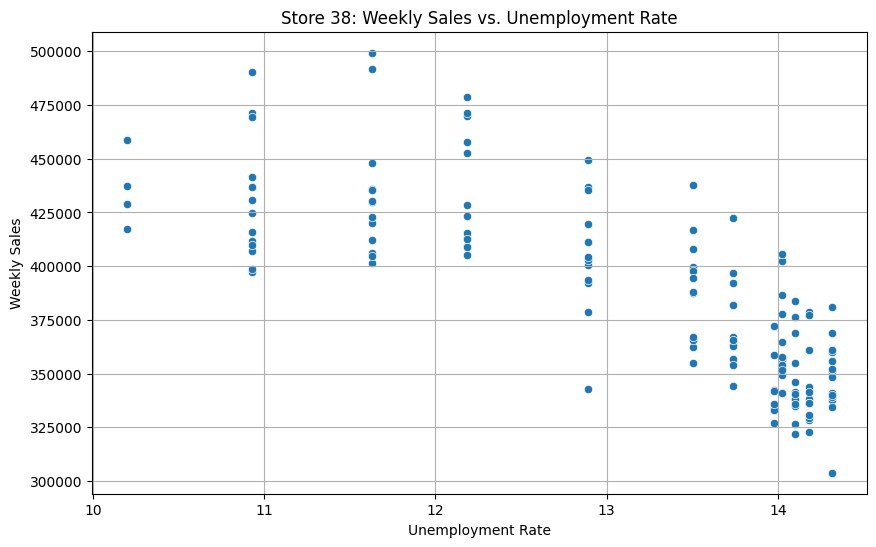

In [118]:
if not most_affected_stores.empty:
    affected_store = most_affected_stores.index[0]
    store_data = df[df['Store'] == affected_store]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_data)
    plt.title(f'Store {affected_store}: Weekly Sales vs. Unemployment Rate')
    plt.xlabel('Unemployment Rate')
    plt.ylabel('Weekly Sales')
    plt.grid()
    plt.show()
else:
    print("No stores show a significant negative correlation between Weekly Sales and Unemployment.")

Insights:

When the Unemployment Rate reaches around 13% to 14%, the Weekly Sales for this store drop below $400,000.

In [119]:
# Extract Month and Year from the Date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Aggregate weekly sales by month and year
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Checking the aggregated monthly sales data
monthly_sales


,Year,Month,Weekly_Sales
0,2010,2,1.903330e+08
1,2010,3,1.819198e+08
2,2010,4,2.314124e+08
3,2010,5,1.867109e+08
4,2010,6,1.922462e+08
5,2010,7,2.325801e+08
6,2010,8,1.876401e+08
7,2010,9,1.772679e+08
8,2010,10,2.171618e+08
9,2010,11,2.028534e+08


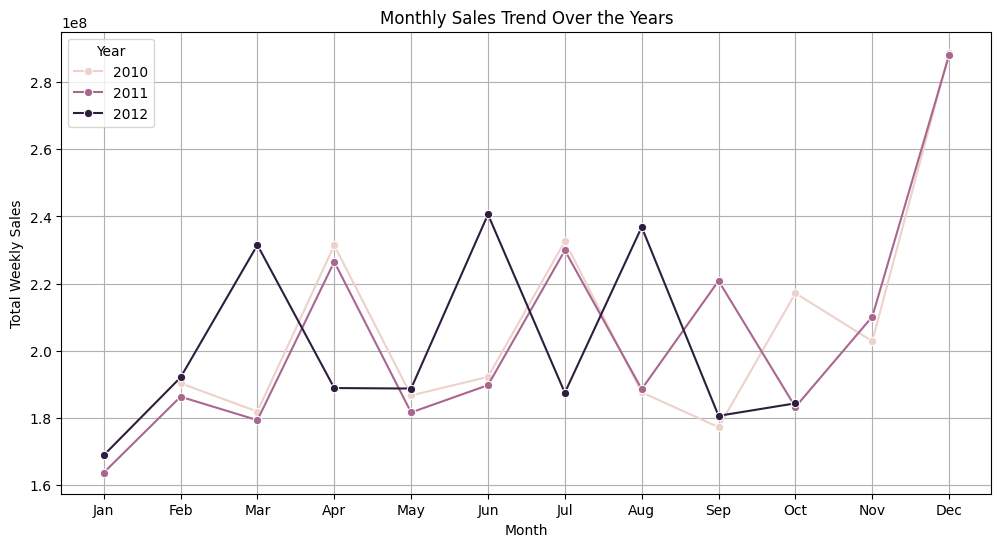

In [120]:
# Create a line plot for Monthly Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend(title='Year')
plt.show()


Insights:
- **Peak Sales** : December consistently shows the highest Weekly Sales figures across the years.This spike is likely due to the holiday season, including Christmas and New Year shopping, when consumers typically increase their spending.

- **Summer Sales** : There is a notable increase in sales during the summer months, particularly in July. This increase reflects seasonal shopping trends, such as vacations and summer promotions

- **Lower Sales** : January and February generally have the lowest sales figures. Post-holiday season, consumer spending typically declines as people recover from holiday expenses.


**Analysis of the 2012 Decrease**

In 2012, there was a drop in weekly sales from June to July, which is different from previous years when sales usually go up in the summer. This change could be because of several reasons:

Economic Factors,Increased Competition,Weather Conditions etc...

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


### Correlation Between Temperature and Weekly Sales

In [130]:
# Calculate the correlation between Temperature and Weekly Sales
temperature_correlation = df['Temperature'].corr(df['Weekly_Sales'])
print(f'Correlation between Temperature and Weekly Sales: {temperature_correlation:}')

Correlation between Temperature and Weekly Sales: -0.06381001317946955


#### Visualize the Relationship Between Temperature and Weekly Sales

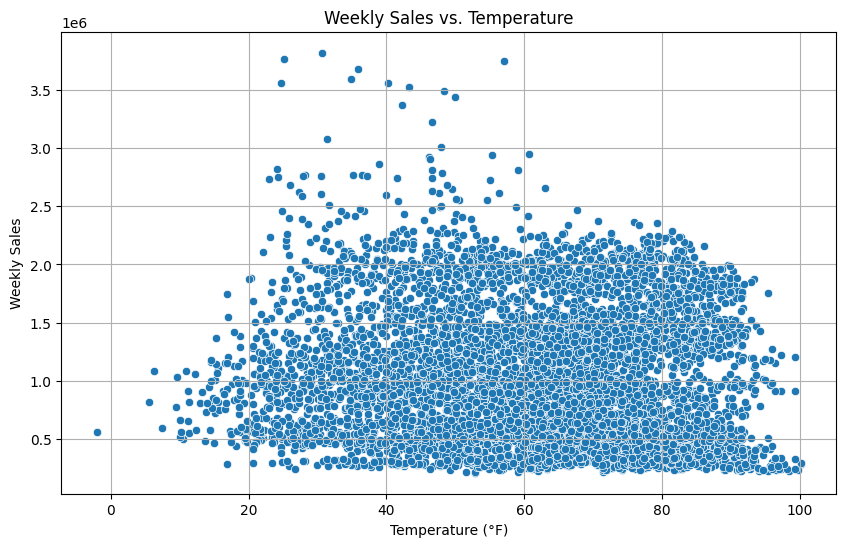

In [131]:
# Visualize the relationship between Temperature and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

Insights:

The relationship between temperature and sales is weak

The correlation value of -0.06 suggesta that temperature has almost no effect on how much the stores sell each week.

### How is the Consumer Price index affecting the weekly sales of various stores?


In [134]:
# Calculate the correlation between Weekly Sales and CPI for each store
store_cpi_correlation = df.groupby('Store')[['Weekly_Sales', 'CPI']].corr().unstack().iloc[:, 1]

# Display stores with strong positive and negative correlation
strong_positive_correlation = store_cpi_correlation[store_cpi_correlation > 0.5]
strong_negative_correlation = store_cpi_correlation[store_cpi_correlation < -0.5]

print("Stores with strong positive correlation between CPI and Weekly Sales:")
print(strong_positive_correlation)

print("\nStores with strong negative correlation between CPI and Weekly Sales:")
print(strong_negative_correlation)

Stores with strong positive correlation between CPI and Weekly Sales:
Store
38    0.812837
44    0.740150
Name: (Weekly_Sales, CPI), dtype: float64

Stores with strong negative correlation between CPI and Weekly Sales:
Store
36   -0.915095
Name: (Weekly_Sales, CPI), dtype: float64


Insights:

####Stores with Strong Positive Correlation:

- **Store 38 and 44** : When prices go up (CPI increases), sales at Store 38 also go up. This suggests that customers continue to buy from this store even when prices rise. This could be because the store has good products or effective marketing

####Store with Strong Negative Correlation:
- For **Store 36**, as prices go up, sales go down a lot. This means that customers are likely unhappy with higher prices and are buying less. The store might need to rethink its prices or improve its products to attract customers.



###  Display Top 10 Performing Stores

In [150]:
# Calculate the total weekly sales for each store
total_weekly_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

# Display the top-performing stores
print("Top Performing Stores Based on Total Weekly Sales:")
top_performing_stores = total_weekly_sales.head(10)

Top Performing Stores Based on Total Weekly Sales:


,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


### Display top 10 worst performing stores

In [152]:
lowest_performing_store = total_weekly_sales.tail(10).sort_values(by='Weekly_Sales')

lowest_performing_store

,Store,Weekly_Sales
44,33,37160221.96
43,44,43293087.84
42,5,45475688.90
41,36,53412214.97
40,38,55159626.42
39,3,57586735.07
38,30,62716885.12
37,37,74202740.32
36,16,74252425.40
35,29,77141554.31


In [157]:
# Display the highest and lowest performing stores and the difference
print(f"\nHighest Performing Store:\n{top_performing_stores.head(1)}")
print(f"\n\nLowest Performing Store:\n{lowest_performing_store.head(1)}")


Highest Performing Store:
   Store  Weekly_Sales
0     20  3.013978e+08


Lowest Performing Store:
    Store  Weekly_Sales
44     33   37160221.96


In [163]:
highest_sales_value = total_weekly_sales.head(1)['Weekly_Sales'].values[0]  # Highest sales value
lowest_sales_value = total_weekly_sales.tail(1)['Weekly_Sales'].values[0]  # Lowest sales value

# Calculate the difference
difference = highest_sales_value - lowest_sales_value

print(f"The highest weekly sales are: {highest_sales_value}")
print(f"\nThe lowest weekly sales are: {lowest_sales_value}")
print(f"\nThe difference between the highest and lowest performing stores is: {difference}")

The highest weekly sales are: 301397792.46

The lowest weekly sales are: 37160221.96

The difference between the highest and lowest performing stores is: 264237570.49999997


### Sales Forecasting

In [183]:
from prophet import Prophet
weekly_sales = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

# Create a forecast function
def forecast_sales(store_id):
    store_data = weekly_sales[weekly_sales['Store'] == store_id][['Date', 'Weekly_Sales']]
    store_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

    # Instantiate and fit the Prophet model
    model = Prophet(weekly_seasonality=True)
    model.fit(store_data)

    # Create a dataframe for future dates
    future = model.make_future_dataframe(periods=12, freq='W')

    # Forecast the future sales
    forecast = model.predict(future)

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f"Sales Forecast for Store {store_id}")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.show()

    return forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprckfv5tr/ec_e_p6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprckfv5tr/tzy3duty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83800', 'data', 'file=/tmp/tmprckfv5tr/ec_e_p6k.json', 'init=/tmp/tmprckfv5tr/tzy3duty.json', 'output', 'file=/tmp/tmprckfv5tr/prophet_modelikl2h7tn/prophet_model-20241013100920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:09:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:09:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


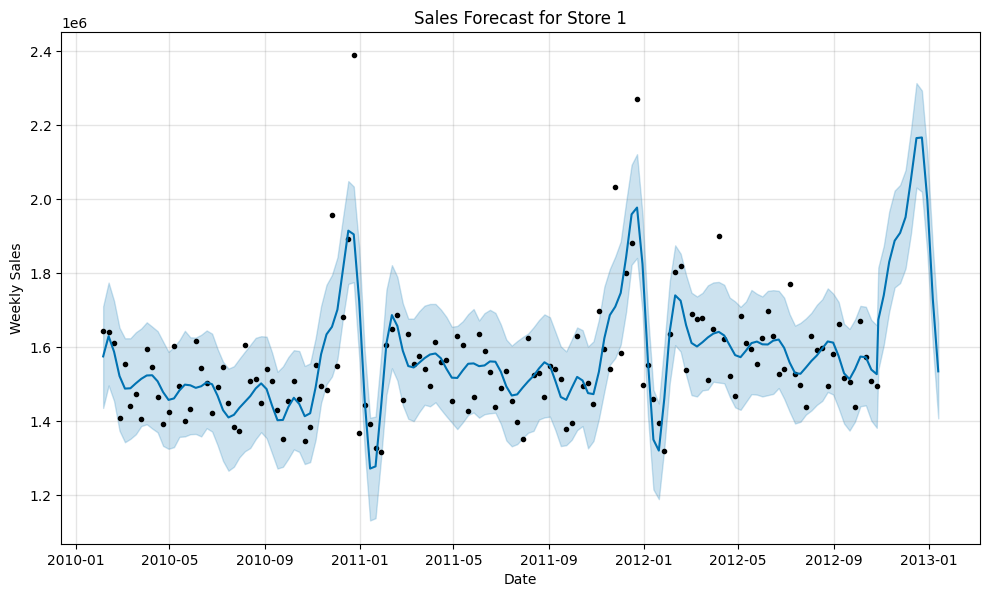

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.602059e+06,1.435518e+06,1.710260e+06,1.602059e+06,1.602059e+06,-27236.805908,-27236.805908,-27236.805908,-119407.624601,-119407.624601,-119407.624601,92170.818692,92170.818692,92170.818692,0.0,0.0,0.0,1.574822e+06
1,2010-02-12,1.603169e+06,1.496299e+06,1.774220e+06,1.603169e+06,1.603169e+06,26454.046706,26454.046706,26454.046706,-119407.624601,-119407.624601,-119407.624601,145861.671307,145861.671307,145861.671307,0.0,0.0,0.0,1.629623e+06
2,2010-02-19,1.604278e+06,1.454282e+06,1.724854e+06,1.604278e+06,1.604278e+06,-16722.969963,-16722.969963,-16722.969963,-119407.624601,-119407.624601,-119407.624601,102684.654638,102684.654638,102684.654638,0.0,0.0,0.0,1.587555e+06
3,2010-02-26,1.605388e+06,1.374087e+06,1.652265e+06,1.605388e+06,1.605388e+06,-83473.597495,-83473.597495,-83473.597495,-119407.624601,-119407.624601,-119407.624601,35934.027106,35934.027106,35934.027106,0.0,0.0,0.0,1.521914e+06
4,2010-03-05,1.606498e+06,1.342934e+06,1.623711e+06,1.606498e+06,1.606498e+06,-118631.630331,-118631.630331,-118631.630331,-119407.624601,-119407.624601,-119407.624601,775.994270,775.994270,775.994270,0.0,0.0,0.0,1.487866e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2012-12-16,1.767821e+06,2.030940e+06,2.313257e+06,1.767820e+06,1.767821e+06,396820.557855,396820.557855,396820.557855,19901.408302,19901.408302,19901.408302,376919.149553,376919.149553,376919.149553,0.0,0.0,0.0,2.164642e+06
151,2012-12-23,1.768932e+06,2.019712e+06,2.293091e+06,1.768931e+06,1.768933e+06,397311.636110,397311.636110,397311.636110,19901.408301,19901.408301,19901.408301,377410.227809,377410.227809,377410.227809,0.0,0.0,0.0,2.166244e+06
152,2012-12-30,1.770043e+06,1.854385e+06,2.123054e+06,1.770042e+06,1.770044e+06,226289.798287,226289.798287,226289.798287,19901.408302,19901.408302,19901.408302,206388.389985,206388.389985,206388.389985,0.0,0.0,0.0,1.996333e+06
153,2013-01-06,1.771154e+06,1.605172e+06,1.870711e+06,1.771153e+06,1.771155e+06,-40870.883857,-40870.883857,-40870.883857,19901.408302,19901.408302,19901.408302,-60772.292159,-60772.292159,-60772.292159,0.0,0.0,0.0,1.730283e+06


In [184]:
forecast_sales(store_id=1)